# 9. Interest Rate Futures

In [3]:
from fixedincome2025 import table

## Types of Interest Rate Futures

* Futures are exchange products
* There is a margin mechanism to avoid default risk
* In the U.S., by far the most pupolar interest rate futures are
    * Treasury futures
    * SOFR futures
* Both products of the CME group

## Treasury Futures Overview

* Historical note: Treasury futures were CBOT (Chicago Board of Trade) products. CBOT merged with CME (Chicago Mercantile Exchange) in 2007 to form the current CME group
* Deliverable bonds
    * A typical futures contract requires one party to deliver a specified quantity of the underlying commodity (think of [15,000 pounds of frozen concentrated orange juice](https://www.ice.com/products/30/FCOJ-A-Futures)) to the other on the delivery date
    * But there are so many treasuries with various dates and coupon rates this won't work
    * Treasury futures are structured in a way that, all similar treasuries can be delivered
* Delivery date
    * There is not a set delivery date. The party with a short position can choose to deliver on any business day of the contract month
* Contract size: One contract involves the delivery of $\$100,000$ face value of the bonds

## Quotes

* Treasury bond futures prices are quoted int he same way as the Treasury bond prices (the spot market)
* Quotes are in dollars and 32nds of a dollar per $\$100$ face value
    * $110$-$03$ means $\$110\frac{3}{32}$ for a T-bond with face value $\$100$
    * One futures contract represents $\$100,000$ face value of the delivered bonds so $1,000$ such bonds with face value $\$100$
    * If the quoted price dropded by $\$1$, say from $110$-$03$ to $109$-$03$, the holder of a futures contract lose $\$1,000$

## Treasury Futures

* For specs of Treasury futures, see [cmegroup.com](https://www.cmegroup.com/) > MARKETS > Interest Rates > U.S. Treasuries
    * More detailed spec in the [rule book](https://www.cmegroup.com/rulebook/CBOT/), for example [Chapter 18](https://www.cmegroup.com/rulebook/CBOT/II/18.pdf) for ZBZ5

* There are 6 types of Treasury Futures

In [14]:
table('treasury_futures')

,Ticker,Remaining Term,Original Term,Notes
2-Year T-Note Futures,ZTZ5,"[1y9m, 2y]",<= 5y3m,
5-Year T-Note Futures,ZFZ5,>= 4y2m,<= 5y3m,
10-Year T-Note Futures,ZNZ5,"[6.5y, 8y]",,
Ultra 10-Year U.S. T-Note Futures,TNZ5,"[9y5m, 10y]",10y,
U.S. T-Bond Futures,ZBZ5,"[15y, 25y)",,Can be callable
Ultra U.S. T-Bond Futures,UBZ5,>= 25y,,


* The remaining term is counting from the first day of the contract delivery month Dec 2025

## Delivery Month Code

* ZBZ5 means Dec 2025 contract, ZBH6 means Mar 2025 contract, etc.

$$
$$

| Code | Month | Code | Month | Code | Month |
|:-----|:------|:-----|:------|:-----|:------|
| F | January | G | February | H | March |
| J | April | K | May | M | June |
| N | July | Q | August | U | September |
| V | October | X | November | Z | December |

$$
$$

* There are **quarterly futures** for March, June, September and December (HMUZ) and **serial futures** for other "off-quarter" months
* For Treasury futures, only quarterly are trading. For SOFR futures, serial are also trading
* Quarterly are much more liquid and important

## 

* Cash received by the short when a bond is delivered is
$$
(\text{Most recent futures settlement price} \times \text{Conversion factor}) + \text{Accrued interest}
$$

## Treasury Bond Futures

- Topics: Treasury (T-) bond futures, quoted prices, conversion factors, and the cheapest-to-deliver (CTD) concept.
- Contract convention summary: contract delivers a specified face value (commonly $\$100,000$), quoted in dollars and 32nds of a dollar per $\$100$ par; settlement uses a quoted futures price multiplied by a conversion factor for the delivered bond.
- We'll extract conversion-factor formulas and work a textbook example programmatically.

## Conversion Factor

- The conversion factor for a bond is the quoted price (per $100 par) that the bond would have if yields for all maturities equaled 6% per annum (semiannual compounding).
- Cash received by the short when a bond is delivered is: (Most recent settlement price × Conversion factor) + Accrued interest.
- The cost of purchasing a bond is: Quoted bond price + Accrued interest.
- The cheapest-to-deliver bond is the one that minimizes: Quoted bond price - (Most recent settlement price × Conversion factor) (ignoring accrued interest for relative comparisons if accruals are small or cancel).

Example (textbook): a three-bond comparison is given in the text with quoted prices and conversion factors. We'll reproduce that example numerically below.

In [2]:
# Reproduce the textbook cheapest-to-deliver example
# Quoted bond prices (per $100) and conversion factors from the textbook table

quoted = [99.50, 143.50, 119.75]  # quoted bond prices for bonds 1..3
conv = [1.0382, 1.5188, 1.2615]    # conversion factors for bonds 1..3
settlements = [93.08, 93.25]       # recent settlement prices considered in the example

def ct_delivery_costs(settle):
    costs = []
    for q, c in zip(quoted, conv):
        # cost-to-deliver (ignores accrued interest for the simple comparison used in the textbook)
        cost = round(q - (settle * c), 2)
        costs.append(cost)
    return costs

for s in settlements:
    costs = ct_delivery_costs(s)
    cheapest_idx = min(range(len(costs)), key=lambda i: costs[i])
    print(f"Settlement = {s}: costs = {costs}; cheapest bond = {cheapest_idx+1} (cost = ${costs[cheapest_idx]:.2f})")

Settlement = 93.08: costs = [2.86, 2.13, 2.33]; cheapest bond = 2 (cost = $2.13)
Settlement = 93.25: costs = [2.69, 1.87, 2.12]; cheapest bond = 2 (cost = $1.87)


## Cheapest-to-Deliver (CTD)

- The CTD bond is not fixed; it depends on the recent settlement price and relative conversion factors. Market factors (yield curve level and slope, coupon distribution, and special delivery options such as the wild-card) influence which bond is CTD.
- In practice, the short examines all deliverable bonds and computes the net cost (including accrued interest and any repo/financing) to find the CTD — the bond that minimizes the net cost of delivery.

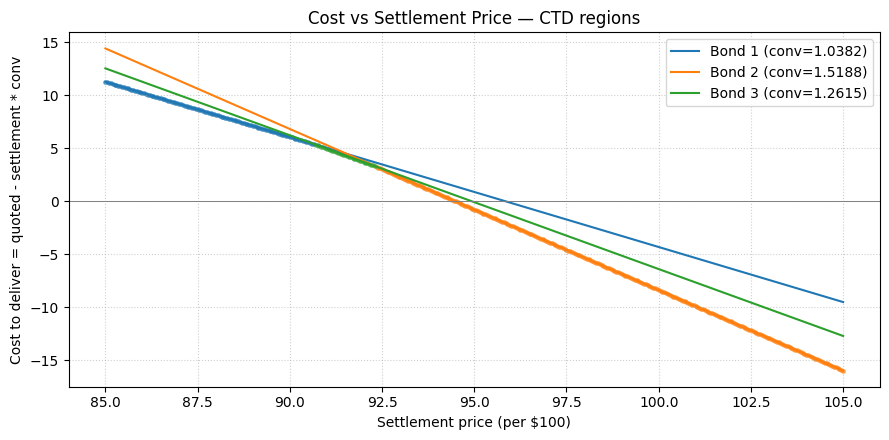

CTD intervals (bond_index, settlement_low, settlement_high):
  Bond 1: 85.00 — 90.65
  Bond 3: 90.70 — 92.30
  Bond 2: 92.35 — 105.00


In [3]:
# Plot cost-to-deliver vs settlement price to visualize CTD regions
import numpy as np
import matplotlib.pyplot as plt

# Use existing quoted/conv if present in the kernel, otherwise fall back to the textbook values
try:
    quoted
    conv
except NameError:
    quoted = [99.50, 143.50, 119.75]
    conv = [1.0382, 1.5188, 1.2615]

# settlement price grid to scan (per $100 par)
s_range = np.linspace(85, 105, 401)
# compute costs: quoted - settle * conv for each bond across the grid
costs = np.array([[q - s * c for s in s_range] for q, c in zip(quoted, conv)])

# plot
plt.figure(figsize=(9, 4.5))
for i, cost in enumerate(costs):
    plt.plot(s_range, cost, label=f'Bond {i+1} (conv={conv[i]})')

# identify CTD index at each settlement price and mark regions
ctd_idx = np.argmin(costs, axis=0)
for i in range(len(quoted)):
    mask = ctd_idx == i
    plt.scatter(s_range[mask], costs[i, mask], s=6, alpha=0.6)

plt.axhline(0, color='gray', linewidth=0.7)
plt.xlabel('Settlement price (per $100)')
plt.ylabel('Cost to deliver = quoted - settlement * conv')
plt.title('Cost vs Settlement Price — CTD regions')
plt.legend(loc='upper right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Print intervals where each bond is CTD (continuous ranges)
changes = np.where(np.diff(ctd_idx) != 0)[0]
intervals = []
start = 0
current = ctd_idx[0]
for ch in changes:
    end = ch
    intervals.append((current, s_range[start], s_range[end]))
    start = ch + 1
    current = ctd_idx[ch + 1]
# final interval
intervals.append((current, s_range[start], s_range[-1]))

print('CTD intervals (bond_index, settlement_low, settlement_high):')
for b, low, high in intervals:
    print(f'  Bond {b+1}: {low:.2f} — {high:.2f}')

## Contract-spec Summary — CBOT/CME U.S. Treasury Futures (teaching summary, not verbatim)

Below is a concise, teaching-ready summary of typical deliverable rules and invoice mechanics for U.S. Treasury futures traded on CBOT/CME. This is a paraphrased summary for classroom use and **not** the official contract wording — always consult the exchange product specification for trading or legal use.

Key items (typical):

- Deliverable securities: Standard fixed-coupon U.S. Treasury bonds/notes that satisfy a remaining-maturity window defined by the contract (the exact window is specified in the product spec). Deliverable issues are normally registered, non-callable, fixed-coupon Treasury securities listed by CUSIP and must meet the contract's maturity bounds and other eligibility rules.

- Maturity windows (typical, classroom summary): many contracts require the delivered security to have remaining time to final coupon/maturity within a specified range measured from the first delivery day. Example contract names and typical focus: 30-yr Treasury Bond futures (long-end), 20-yr, 10-yr (note), 5-yr (medium-term note), 2-yr (short-term note), and Ultra/mini variants. Exact numeric windows vary by contract — treat these as placeholders for teaching until you reference the official spec.

- Conversion factors: the exchange publishes a conversion factor for each eligible bond. Conventionally the conversion factor equals the theoretical clean price (per $100 par) that the bond would have if discounted at a standard 6% annual yield with semiannual compounding. The invoice amount for a delivery = (futures settlement price × conversion factor) + accrued interest on the delivered bond.

- Invoice and net cost: The short receives the invoice amount above when delivering; the short's acquisition cost (to obtain the bond to deliver) equals the market cash price paid plus financing costs (repo) and any transaction fees. Traders determine the cheapest-to-deliver (CTD) by minimizing net cost = (cash purchase price + financing + accrued) − invoice proceeds (or equivalently minimize quoted − settlement×conv when accruals/financing are small or ignored for pedagogy).

- Notice and delivery procedure: The short gives notice of intent to deliver during the contract's delivery month; the exchange assigns a delivery notice to a long, and transfer/settlement follows the exchange's delivery calendar and clearing instructions. Practical class examples often simplify the notice/matching details to focus on CTD and conversion-factor mechanics.

- Exclusions & special cases: Certain instruments (e.g., STRIPS, non-standard coupon structures, or securities with special tax/treatment) may be ineligible. Ex-coupon dates, accrued-interest conventions, and accrued-interest rounding can affect the numerical CTD choice. Some contracts allow adjustments or have rounding rules; check the product spec for details.

Teaching notes:
- For classroom CTD demonstrations it's common to (a) use quoted clean prices and conversion factors and (b) omit small accrued-interest differences to make the conversion-factor crossovers clear. For production valuation, include full invoice (accrued, repo/financing) and any delivery/notice fees.
- Conversion factors depend only on a bond's coupon and remaining cashflow schedule; students can compute them by discounting the bond cashflows at 6% (semiannual) and solving for the implied clean price per $100 par.
- I can add a short table next (one cell) listing the standard contract names and a classroom-style placeholder for their usual deliverable maturity ranges; later we can replace placeholders with verbatim spec text or exact product URLs when we obtain the exchange PDFs/links.

(End of summary — not contract text.)

## Placeholder: Standard Treasury Futures (classroom table, verify with exchange specs)

The table below lists common U.S. Treasury futures contracts and classroom-style placeholder deliverable maturity ranges. These are teaching placeholders — I will replace them with exact contract-spec text or PDF citations once we fetch the official specs.

| Contract (typical ticker) | Classroom placeholder deliverable maturity window | Notes |
|---|---:|---|
| 30‑Year Treasury Bond (ZB) | ~15 to 30+ years remaining to maturity | Long‑end bond futures; conversion factors published per‑issue |
| 20‑Year Treasury Bond (25) | ~15 to 25 years remaining | Used for intermediate long bond exposure; check spec for exact bounds |
| 10‑Year Treasury Note (ZN) | ~6.5 to 10 years remaining | Standard note futures; widely used for curve hedging |
| Ultra 10‑Year (UB / Ultra 10) | slightly longer remaining maturity than standard 10y | Larger‑notional / liquidity differences; verify spec |
| 5‑Year Treasury Note (ZF) | ~4 to 6 years remaining | Medium‑term note futures; check coupon/issue eligibility |
| 2‑Year Treasury Note (ZT) | ~1 to 3 years remaining | Shorter tenor; convertible bond list narrower; verify spec |

Instruction: Treat the numeric ranges above as placeholders for pedagogical examples. When we obtain the product‑spec PDFs or exact rulebook pages, I will (a) replace the ranges with verbatim contract windows, (b) include any coupon or CUSIP eligibility rules, and (c) add links/citations to the exchange source.

## Why invoice = (settlement × conversion factor) + accrued interest

Treasury futures are designed to allow a short to deliver any one of a set of eligible Treasury securities (different coupons and maturity dates). Because delivered bonds differ in coupon and remaining cashflows, the exchange converts the quoted futures price into the cash amount payable for a specific bond using two adjustments:

- Conversion factor: normalizes a bond's price to the futures basis. The conversion factor equals the theoretical clean price (per $100 par) that the bond would have at a standard reference yield (historically 6% with semiannual compounding). Multiplying the futures settlement by the bond's conversion factor gives the invoice 'clean' price component for that bond.
- Accrued interest: compensates the deliverer for coupon interest that has accrued since the last coupon date. Bonds trade with accrued interest in the cash market, so delivery must include accrued interest to fully compensate the short.

Together these terms give the cash the short receives when delivering a particular bond:

```
Invoice = (futures settlement × conversion factor) + accrued interest
```

Why other futures don't need this: many futures reference a single standardized deliverable (a fixed grade/quantity and location) or are cash‑settled (equity index futures). Those contracts don't require a per‑issue normalization by coupon and hence don't use a conversion factor plus accrued interest term.

Practical consequence: the conversion‑factor system creates delivery optionality (the short chooses which eligible bond to deliver) and gives rise to cheapest‑to‑deliver (CTD) behavior and a persistent basis between cash and futures. Traders must include CF, accrued interest, and financing/repo costs when evaluating delivery or arbitrage decisions.

Example (illustrative):
- Futures settlement = 95.00 (per $100 par)
- Bond conversion factor = 1.25
- Accrued interest = 0.45
- Invoice = 95.00 × 1.25 + 0.45 = 119.20

If the bond's clean market price = 119.10, the short's approximate pre‑financing net = (119.10 + 0.45) − 119.20 = +0.35 (profit before financing/repo cost).

(End of explanation — I can expand this section with a short diagram or add references to the CBOT rulebook if you'd like.)